In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import random

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the Dataset

In [2]:
data = pd.read_csv('input_game.csv')

In [3]:
data

,game_id,p1_id,p2_id,p1_action,p2_action,turn
0,0,174,125,TRUST,CHEAT,1
1,0,174,125,CHEAT,TRUST,2
2,0,174,125,TRUST,TRUST,3
3,0,174,125,TRUST,TRUST,4
4,0,174,125,TRUST,TRUST,5
...,...,...,...,...,...,...
180401,3014,157,169,CHEAT,TRUST,64
180402,3014,157,169,CHEAT,TRUST,65
180403,3014,157,169,CHEAT,TRUST,66
180404,3014,157,169,CHEAT,TRUST,67


In [4]:
games = []
for game_id, group_df in data.groupby('game_id'):
    games.append(group_df.copy())

In [5]:
add = {'self_c': [], 'opp_c': [], 'self_t': [], 'opp_t': []}
players = [pd.DataFrame(add) for i in range(1, 203)]

In [6]:
player_cheat = [0 for i in range(1, 203)]
player_total = [0 for i in range(1, 203)]

In [7]:
for game in games:
    p1 = game['p1_id'].iloc[0]
    p2 = game['p2_id'].iloc[0]

    p1_t = len(game[game['p1_action'] == "TRUST"])
    p1_c = len(game[game['p1_action'] == "CHEAT"])
    p2_c = len(game[game['p2_action'] == "TRUST"])
    p2_t = len(game[game['p2_action'] == "CHEAT"])
    total = p1_t + p1_c

    player_cheat[p1] += p1_c
    player_total[p1] += total

    player_cheat[p2] += p2_c
    player_total[p2] += total

    new_row = {'self_c': p1_c, 'opp_c': p2_c, 'self_t': p1_t, 'opp_t': p2_t}
    players[p1].loc[len(players[p1].index)] = new_row
    
    new_row = {'self_c': p2_c, 'opp_c': p1_c, 'self_t': p2_t, 'opp_t': p1_t}
    players[p2].loc[len(players[p2].index)] = new_row

In [8]:
for i in range(1, 202):
    player_cheat[i] /= player_total[i]

## Plotting Cheat Percentages over all games for a player

(array([ 1.,  0.,  0.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
         1.,  2.,  4.,  0.,  1.,  3.,  3.,  3.,  3.,  8.,  3.,  9., 14.,
        13., 17., 23., 12., 13., 13., 10.,  9.,  5.,  5.,  3.,  4.,  3.,
         2.,  1.,  0.,  1.,  0.,  3.,  0.,  0.,  2.,  0.,  2.]),
 array([0.        , 0.01716184, 0.03432367, 0.05148551, 0.06864734,
        0.08580918, 0.10297101, 0.12013285, 0.13729469, 0.15445652,
        0.17161836, 0.18878019, 0.20594203, 0.22310386, 0.2402657 ,
        0.25742754, 0.27458937, 0.29175121, 0.30891304, 0.32607488,
        0.34323671, 0.36039855, 0.37756039, 0.39472222, 0.41188406,
        0.42904589, 0.44620773, 0.46336957, 0.4805314 , 0.49769324,
        0.51485507, 0.53201691, 0.54917874, 0.56634058, 0.58350242,
        0.60066425, 0.61782609, 0.63498792, 0.65214976, 0.66931159,
        0.68647343, 0.70363527, 0.7207971 , 0.73795894, 0.75512077,
        0.77228261, 0.78944444, 0.80660628, 0.82376812, 0.84092995,
        0.85809179]),
 <BarContainer

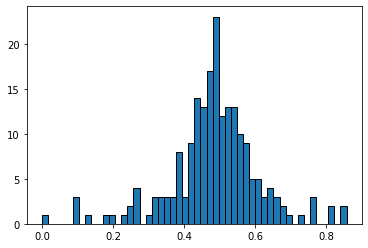

In [9]:
plt.hist(player_cheat, bins=50, edgecolor='black')

## Observations
- We can clearly see some players almost always playing "CHEAT" and some players never playing "CHEAT"
- The players near the centre of the plot seem to playing "CHEAT" and "TRUST" almost equal number of times
- Players could also been playing random moves which do not depend on the past information

## Using scores as a metric

In [10]:
score = {'score': []}
scores = [pd.DataFrame(score) for i in range(0, 202)]

In [11]:
for game in games:
    p1_score = 0
    p2_score = 0
    p1 = game['p1_id'].iloc[0]
    p2 = game['p2_id'].iloc[0]

    game1 = game[game['p1_action'] == "TRUST"]
    game1 = game1[game1['p2_action'] == "TRUST"]
    p1_score += len(game1) * 2
    p2_score += len(game1) * 2

    game2 = game[game['p1_action'] == "CHEAT"]
    game2 = game2[game2['p2_action'] == "TRUST"]
    p1_score += len(game2) * (3)
    p2_score += len(game2) * (-1)

    game3 = game[game['p1_action'] == "TRUST"]
    game3 = game3[game3['p2_action'] == "CHEAT"]
    p1_score += len(game3) * (3)
    p2_score += len(game3) * (-1)

    game4 = game[game['p1_action'] == "CHEAT"]
    game4 = game4[game4['p2_action'] == "CHEAT"]
    p1_score += len(game4) * 0
    p2_score += len(game4) * 0
    
    new_row = {'score': p1_score / len(game)}
    scores[p1].loc[len(scores[p1].index)] = new_row

    new_row = {'score': p2_score / len(game)}
    scores[p2].loc[len(scores[p2].index)] = new_row

In [12]:
player_scores = np.array([np.array(scores[i+1]['score']).mean() for i in range(201)])

In [13]:
player_scores

array([ 0.75439055,  1.78695167,  1.59590257,  0.09093781,  1.09672789,
        1.7119244 ,  1.545525  ,  2.01402664,  0.98003051, -0.10020318,
        0.75255936,  1.20661677,  1.20648782,  0.06273676, -0.13142461,
        1.63440092,  0.48392052,  0.60543458,  1.17504607,  1.31224769,
        0.80464305,  0.51508218,  0.45048659,  1.54976118, -0.27128107,
        0.20417637,  0.90816771,  0.0411537 ,  0.97814943,  0.84860759,
        1.28988003,  1.5527564 , -0.24412725,  0.39933471,  0.93746997,
        0.38525976,  1.12465137,  0.87189924,  1.51332936,  0.92617252,
        2.02301745,  0.63851423,  1.78850773,  0.01075661,  0.55140202,
        0.72787831,  1.74618724,  0.81981122,  0.65752306,  1.56729065,
        0.14350205,  1.26790703,  0.62367245,  1.6262587 ,  0.32343911,
        0.88883395,  0.51262817,  1.41527218,  0.78239758,  0.94903137,
        2.06626227,  1.09217034,  1.3165153 ,  1.36063331,  0.44399896,
        1.80110109,  0.77681196,  0.29734747,  1.26985735,  1.94

#### ignore the error below

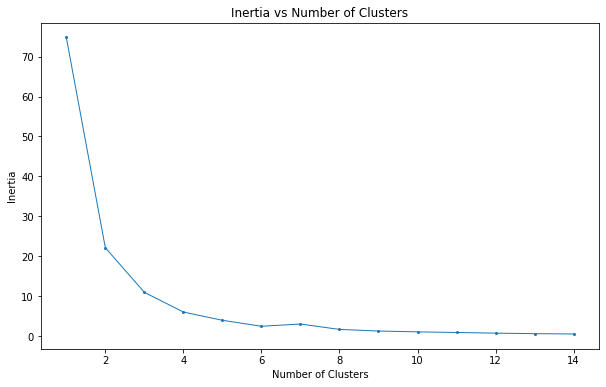

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(player_scores.reshape(-1,1))
    inertias.append(kmeans.inertia_)

# Plot Inertia vs Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), inertias, marker='o', markersize=2, linewidth=1)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()


## Results
- We identify 6 strategies due to the elbow at n = 6

In [15]:
num_clusters = 6

# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(player_scores.reshape(-1,1))

# Get the indices of samples belonging to each cluster
indices_by_cluster = {}
answer = []
for cluster_label in range(num_clusters):
    indices = [i+1 for i, label in enumerate(kmeans.labels_) if label == cluster_label]
    indices_by_cluster[cluster_label] = indices
    answer += [indices]

In [16]:
string_representation = str(answer)

# Write the string representation to a text file
with open('list_of_lists.txt', 'w') as file:
    file.write(string_representation)

## Defining Simulation Class

In [17]:
from enum import Enum
from typing import List

In [18]:
class Action(Enum):
    TRUST = 1
    CHEAT = 2

def strategy_trust(past_self, past_opponent):
    return Action.TRUST

def strategy_cheat(past_self, past_opponent):
    return Action.CHEAT

def strategy_tit_tat(past_self, past_opponent):
    if len(past_self) == 0: 
        return Action.TRUST
    return past_opponent[-1]

def strategy_alternate(past_self, past_opponent):
    if len(past_self) % 2 == 0:
        return Action.TRUST
    else:
        return Action.CHEAT

def strategy_tit2tat(past_self, past_opponent):
    if len(past_self) < 2:
        return Action.TRUST

    if past_opponent[-1] == Action.CHEAT and past_opponent[-2] == Action.CHEAT:
        return Action.CHEAT
    return Action.TRUST

def strategy_3t1c(past_self, past_opponent):
    if len(past_self) % 4 == 3:
        return Action.CHEAT
    else:
        return Action.TRUST

def strategy_random(past_self, past_opponent):
    random_number = random.randint(0, 1)
    if random_number == 0:
        return Action.TRUST
    else:
        return Action.CHEAT

In [19]:
strats = {'trust': strategy_trust, 'cheat' : strategy_cheat, 'tit-for-tat' : strategy_tit_tat, 'alternate' : strategy_alternate, 'tit2tat' : strategy_tit2tat, 'random' : strategy_random, 'strategy_3t1c' : strategy_3t1c}
scores_dict = {'trust':[], 'cheat':[], 'tit-for-tat':[], 'alternate':[], 'tit2tat' : [], 'random' : [], 'strategy_3t1c' : []}
strategies = strats.keys()
strategies

dict_keys(['trust', 'cheat', 'tit-for-tat', 'alternate', 'tit2tat', 'random', 'strategy_3t1c'])

## Running Simulations

In [20]:
def run_game(st1, st2, num_iter = 20, miscomm = False, var = 10):
    past_self = []
    past_opponent = []

    strat1 = strats[st1]
    strat2 = strats[st2]

    p1_score = 0
    p2_score = 0
    for i in range(num_iter):
        p1_move = strat1(past_self, past_opponent)
        p2_move = strat2(past_opponent, past_self)
        
        if p1_move == Action.TRUST and p2_move == Action.TRUST:
            p1_score += 2
            p2_score += 2

        if p1_move == Action.CHEAT and p2_move == Action.TRUST:
            p1_score += 3
            p2_score += -1

        if p1_move == Action.TRUST and p2_move == Action.CHEAT:
            p1_score += -1
            p2_score += 3

        if p1_move == Action.CHEAT and p2_move == Action.CHEAT:
            p1_score += 0
            p2_score += 0

        if miscomm == True:
            random_number = random.randint(1, 100)
            if random_number <= var:
                if p1_move == Action.TRUST:
                    past_self.append(Action.CHEAT)
                else:
                    past_self.append(Action.TRUST)
            else:
                past_self.append(p1_move)

            random_number = random.randint(1, 100)
            if random_number <= var:
                if p2_move == Action.TRUST:
                    past_opponent.append(Action.CHEAT)
                else:
                    past_opponent.append(Action.TRUST)
            else:
                past_opponent.append(p2_move)

        else:
            past_self.append(p1_move)
            past_opponent.append(p2_move)

    p1_score /= num_iter
    p2_score /= num_iter
    
    scores_dict[st1].append(p1_score)
    scores_dict[st2].append(p2_score)

In [21]:
iters = [random.randint(0, 500) for _ in range(50)]

In [22]:
for strat1 in strategies:
    for strat2 in strategies:
        for iter in iters:
            run_game(strat1, strat2, num_iter = iter, miscomm = False)

trust: Mean Score = 1.0410032103183136
cheat: Mean Score = 1.1970045999374115
tit-for-tat: Mean Score = 1.3564976749412079
alternate: Mean Score = 1.320934458197691
tit2tat: Mean Score = 1.2122704098410668
random: Mean Score = 1.222402025289969
strategy_3t1c: Mean Score = 1.181160334340598


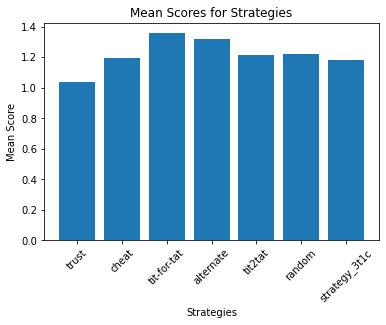

In [23]:
strategy_means = {strategy: np.mean(scores) for strategy, scores in scores_dict.items()}

# Print strategy names and their mean scores
for strategy, mean_score in strategy_means.items():
    print(f"{strategy}: Mean Score = {mean_score}")

# Plot mean scores for each strategy
plt.bar(range(len(strategy_means)), list(strategy_means.values()), align='center')
plt.xticks(range(len(strategy_means)), list(strategy_means.keys()), rotation=45)
plt.xlabel('Strategies')
plt.ylabel('Mean Score')
plt.title('Mean Scores for Strategies')
plt.show()

## Running Simulations with Miscommunication

In [24]:
strats = {'trust': strategy_trust, 'cheat' : strategy_cheat, 'tit-for-tat' : strategy_tit_tat, 'alternate' : strategy_alternate, 'tit2tat' : strategy_tit2tat, 'random' : strategy_random}
scores_dict = {'trust':[], 'cheat':[], 'tit-for-tat':[], 'alternate':[], 'tit2tat' : [], 'random' : []}
strategies = strats.keys()
strategies

dict_keys(['trust', 'cheat', 'tit-for-tat', 'alternate', 'tit2tat', 'random'])

In [25]:
for strat1 in strategies:
    for strat2 in strategies:
        for iter in iters:
            run_game(strat1, strat2, num_iter = iter, miscomm = True, var = 10)

trust: Mean Score = 0.9422332690763505
cheat: Mean Score = 1.1621122079051573
tit-for-tat: Mean Score = 1.1720252412665226
alternate: Mean Score = 1.202787976725957
tit2tat: Mean Score = 1.1240285957891074
random: Mean Score = 1.133324900039791


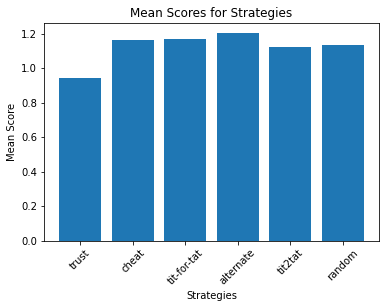

In [26]:
strategy_means = {strategy: np.mean(scores) for strategy, scores in scores_dict.items()}

# Print strategy names and their mean scores
for strategy, mean_score in strategy_means.items():
    print(f"{strategy}: Mean Score = {mean_score}")

# Plot mean scores for each strategy
plt.bar(range(len(strategy_means)), list(strategy_means.values()), align='center')
plt.xticks(range(len(strategy_means)), list(strategy_means.keys()), rotation=45)
plt.xlabel('Strategies')
plt.ylabel('Mean Score')
plt.title('Mean Scores for Strategies')
plt.show()

## 20% Miscommunications

In [27]:
strats = {'trust': strategy_trust, 'cheat' : strategy_cheat, 'tit-for-tat' : strategy_tit_tat, 'alternate' : strategy_alternate, 'tit2tat' : strategy_tit2tat, 'random' : strategy_random}
scores_dict = {'trust':[], 'cheat':[], 'tit-for-tat':[], 'alternate':[], 'tit2tat' : [], 'random' : []}
strategies = strats.keys()
strategies

dict_keys(['trust', 'cheat', 'tit-for-tat', 'alternate', 'tit2tat', 'random'])

In [28]:
for strat1 in strategies:
    for strat2 in strategies:
        for iter in iters:
            run_game(strat1, strat2, num_iter = iter, miscomm = True, var = 20)

trust: Mean Score = 0.8830076154716591
cheat: Mean Score = 1.2929839520820878
tit-for-tat: Mean Score = 1.1461502204999456
alternate: Mean Score = 1.1783479053589512
tit2tat: Mean Score = 1.0448135607377254
random: Mean Score = 1.1267692198304298


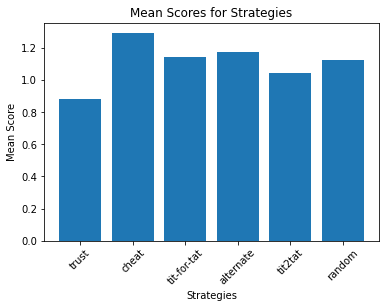

In [29]:
strategy_means = {strategy: np.mean(scores) for strategy, scores in scores_dict.items()}

# Print strategy names and their mean scores
for strategy, mean_score in strategy_means.items():
    print(f"{strategy}: Mean Score = {mean_score}")

# Plot mean scores for each strategy
plt.bar(range(len(strategy_means)), list(strategy_means.values()), align='center')
plt.xticks(range(len(strategy_means)), list(strategy_means.keys()), rotation=45)
plt.xlabel('Strategies')
plt.ylabel('Mean Score')
plt.title('Mean Scores for Strategies')
plt.show()

## 50% Miscommunications

In [30]:
strats = {'trust': strategy_trust, 'cheat' : strategy_cheat, 'tit-for-tat' : strategy_tit_tat, 'alternate' : strategy_alternate, 'tit2tat' : strategy_tit2tat, 'random' : strategy_random}
scores_dict = {'trust':[], 'cheat':[], 'tit-for-tat':[], 'alternate':[], 'tit2tat' : [], 'random' : []}
strategies = strats.keys()
strategies

dict_keys(['trust', 'cheat', 'tit-for-tat', 'alternate', 'tit2tat', 'random'])

In [31]:
for strat1 in strategies:
    for strat2 in strategies:
        for iter in iters:
            run_game(strat1, strat2, num_iter = iter, miscomm = True, var = 50)

trust: Mean Score = 0.6282417533298893
cheat: Mean Score = 1.634387428260424
tit-for-tat: Mean Score = 1.1289407006045638
alternate: Mean Score = 1.1339115328665499
tit2tat: Mean Score = 0.8738779751654278
random: Mean Score = 1.1314907174810733


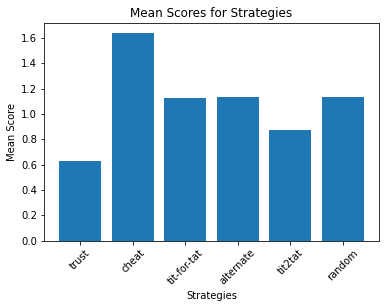

In [32]:
strategy_means = {strategy: np.mean(scores) for strategy, scores in scores_dict.items()}

# Print strategy names and their mean scores
for strategy, mean_score in strategy_means.items():
    print(f"{strategy}: Mean Score = {mean_score}")

# Plot mean scores for each strategy
plt.bar(range(len(strategy_means)), list(strategy_means.values()), align='center')
plt.xticks(range(len(strategy_means)), list(strategy_means.keys()), rotation=45)
plt.xlabel('Strategies')
plt.ylabel('Mean Score')
plt.title('Mean Scores for Strategies')
plt.show()

## 100% Miscommunications

In [33]:
strats = {'trust': strategy_trust, 'cheat' : strategy_cheat, 'tit-for-tat' : strategy_tit_tat, 'alternate' : strategy_alternate, 'tit2tat' : strategy_tit2tat, 'random' : strategy_random}
scores_dict = {'trust':[], 'cheat':[], 'tit-for-tat':[], 'alternate':[], 'tit2tat' : [], 'random' : []}
strategies = strats.keys()
strategies

dict_keys(['trust', 'cheat', 'tit-for-tat', 'alternate', 'tit2tat', 'random'])

In [34]:
for strat1 in strategies:
    for strat2 in strategies:
        for iter in iters:
            run_game(strat1, strat2, num_iter = iter, miscomm = True, var = 50)

trust: Mean Score = 0.6349633946678289
cheat: Mean Score = 1.6374779232021683
tit-for-tat: Mean Score = 1.1237958572758353
alternate: Mean Score = 1.1251880355305686
tit2tat: Mean Score = 0.8750624078834877
random: Mean Score = 1.1357410657714249


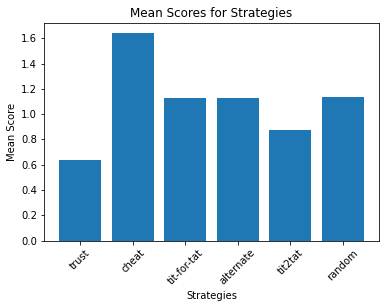

In [35]:
strategy_means = {strategy: np.mean(scores) for strategy, scores in scores_dict.items()}

# Print strategy names and their mean scores
for strategy, mean_score in strategy_means.items():
    print(f"{strategy}: Mean Score = {mean_score}")

# Plot mean scores for each strategy
plt.bar(range(len(strategy_means)), list(strategy_means.values()), align='center')
plt.xticks(range(len(strategy_means)), list(strategy_means.keys()), rotation=45)
plt.xlabel('Strategies')
plt.ylabel('Mean Score')
plt.title('Mean Scores for Strategies')
plt.show()

As expected in this scenario Cheat would be best as the moves written are complete opposite of what were played